In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

C:\Users\USER\AppData\Local\Programs\ipykernel_1328\1083238728.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Gathering and Loading Data

In [3]:
df=pd.read_csv("spam.csv" ,encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [4]:
df.drop(columns={"Unnamed: 2","Unnamed: 3","Unnamed: 4"},inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={"v1":"message_type","v2":"message"},inplace=True)
df.sample(5)

,message_type,message
944,ham,I sent my scores to sophas and i had to do sec...
21,ham,IÛ÷m going to try for 2 months ha ha only joking
1732,ham,"K, can that happen tonight?"
2773,spam,How come it takes so little time for a child w...
2006,ham,Shopping lor. Them raining mah hard 2 leave or...


In [6]:
encoder = LabelEncoder()

df["message_type"] = encoder.fit_transform(df["message_type"])
df["message_type"].sample(5)

df[df["message_type"]==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


### Now let’s check for the missing values

In [7]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [8]:
df.duplicated().sum()

403

There are 403 duplicated values and we have to remove them

In [9]:
df=df.drop_duplicates()

# Exploratory Data Analysis (Visualise)

In [10]:
df["message_type"].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

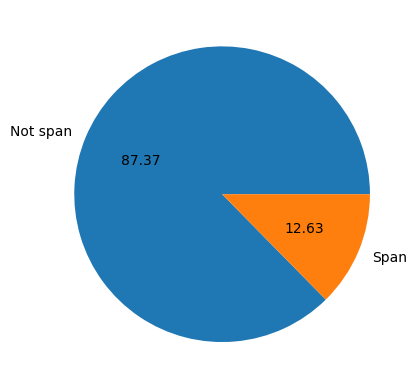

In [11]:
plt.pie(df["message_type"].value_counts(),labels=["Not span","Span"], autopct="%0.2f")
plt.show()

## For a number of Characters

 punkt is the required package for tokenization.

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df["num_characters"] = df["message"].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# For a number of words 

In [14]:
df["message"].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [15]:
df["num_words"]=df["message"].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


# For a number of Sentences

In [16]:
df["message"].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [17]:
df["num_sentences"]=df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# For ‘Ham’ messages

In [18]:
df[df["message_type"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


# For 'Spam' messages

In [19]:
df[df["message_type"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can clearly see the spam messages are quite longer than the ham messages

# for characters

<Axes: xlabel='num_characters', ylabel='Count'>

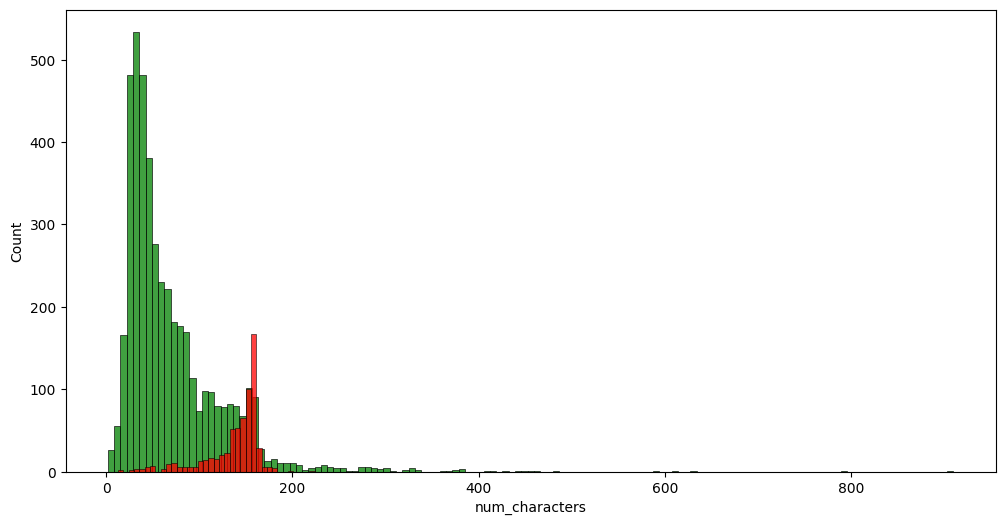

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["message_type"]==0]["num_characters"],color="green")
sns.histplot(df[df["message_type"]==1]["num_characters"],color="red")

# For Words

<Axes: xlabel='num_words', ylabel='Count'>

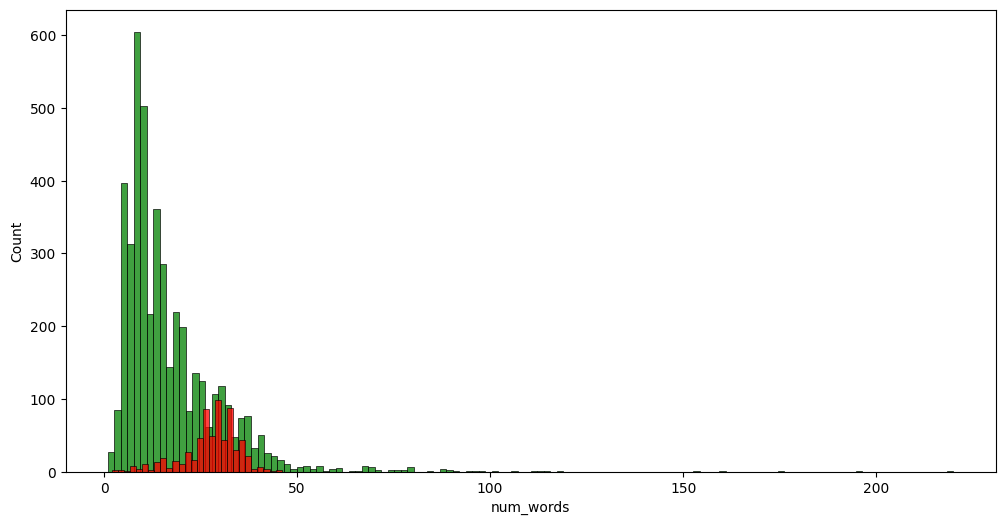

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["message_type"]==0]["num_words"],color="green")
sns.histplot(df[df["message_type"]==1]["num_words"],color="red")

# Data Preprocessing

In [22]:
ps=PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
len(stopwords.words('english')) 

179

In [24]:
df["transformed_msg"] = df["message"].apply(transform_text)
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Wordcloud

In [25]:
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="black")

### For spam

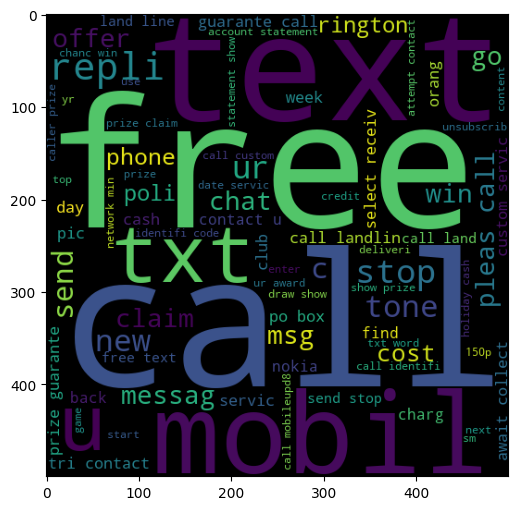

In [26]:
spam_wc =wc.generate(df[df["message_type"]==1]["transformed_msg"].str.cat(sep=""))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

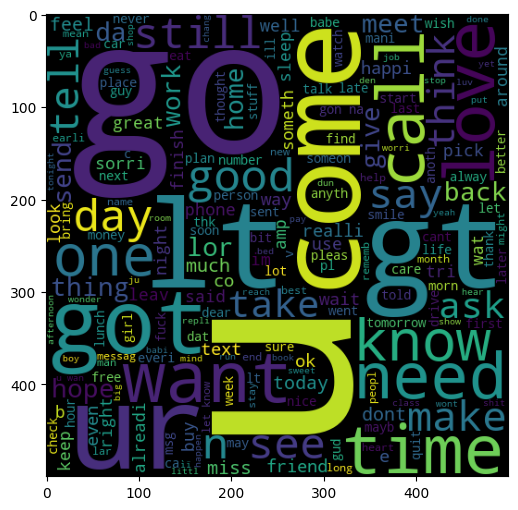

In [27]:
ham_wc =wc.generate(df[df["message_type"]==0]["transformed_msg"].str.cat(sep=""))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [28]:
wcwords=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        wcwords.append(word)


Counter(wcwords).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [29]:
df_word_counts = pd.DataFrame(Counter(wcwords).most_common(30), columns=['Word', 'Count'])

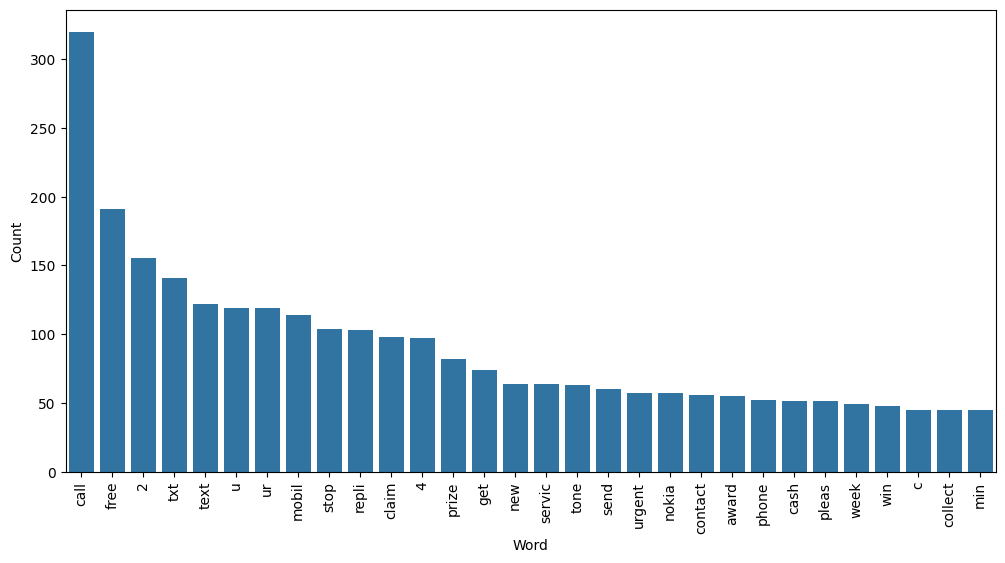

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x="Word",y="Count",data=df_word_counts)
plt.xticks(rotation="vertical")
plt.show()

# Building a Model using Naive Bayes

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [32]:
tfidf= TfidfVectorizer(analyzer='char',max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
Y=df["message_type"].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

# GaussianNB()

In [34]:
gnb.fit(X_train,Y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(Y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(Y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(Y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.28433268858800775
Confusion Matrix of Guassian NB is:  [[156 740]
 [  0 138]]
Precision score of the Gaussian NB is 0.1571753986332574


# BernoulliNB()

In [35]:
bnb.fit(X_train,Y_train)
y_pred2=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(Y_test,y_pred2))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(Y_test,y_pred2))
print('Precision score of the Bernoulli NB is',precision_score(Y_test,y_pred2))

Accuracy score of Bernoulli NB is:  0.9584139264990329
Confusion Matrix of Bernoulli NB is:  [[875  21]
 [ 22 116]]
Precision score of the Bernoulli NB is 0.8467153284671532


# MultinomialNB()

In [36]:
mnb.fit(X_train,Y_train)
y_pred3=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(Y_test,y_pred3))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(Y_test,y_pred3))
print('Precision score of the Multinomial NB is',precision_score(Y_test,y_pred3))

Accuracy score of Multinomial NB is:  0.9535783365570599
Confusion Matrix of Multinomial NB is:  [[888   8]
 [ 40  98]]
Precision score of the Multinomial NB is 0.9245283018867925


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

Lets compare other classification algorithms with MNB

In [ ]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')